Abstract: In this lab, we gained hands-on experience in radio astronomy by using the Small Radio Telescope on top of Angell Hall. We observed the Sun and took data to make a rotation curve of the Milky Way Galaxy.

Introduction: In this lab, we investigated what causes the 21cm emission line of hydrogen.  We also investigated why we see it in the Sun and in our galaxy.

In [1]:
#Methods
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import rcParams 
from scipy import ndimage
from astropy.io import fits
from numpy import *
from scipy import optimize
from scipy.optimize import curve_fit
import sys
from scipy.optimize import curve_fit 
from matplotlib import pyplot

root = '/Users/CatherineClark/Documents/College_Senior/Astro_361/radio/sun_azimuth/'

root2 = '/Users/CatherineClark/Documents/College_Senior/Astro_361/radio/sun_elevation/'

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


(array([  3.,   1.,   1.,   0.,   0.,  22.,  14.,   7.,   6.,   4.,   6.,
          3.,   4.,   3.,   3.,   3.,   2.,   2.,   3.,   2.,   2.,   1.,
          2.,   2.,   1.,   2.,   2.,   1.,   1.,   2.,   0.,   1.,   2.,
          1.,   3.,   1.,   2.,   2.,   0.,   1.,   2.,   1.,   1.,   0.,
          1.,   0.,   2.,   2.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,
          1.,   1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.,   1.,   0.,
          1.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   1.,
          0.,   2.,   0.,   2.,   0.,   0.,   1.,   0.,   2.,   0.,   2.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,
          2.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   1.,   1.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,
          1.,   0.,   0.,   0.,   2., 

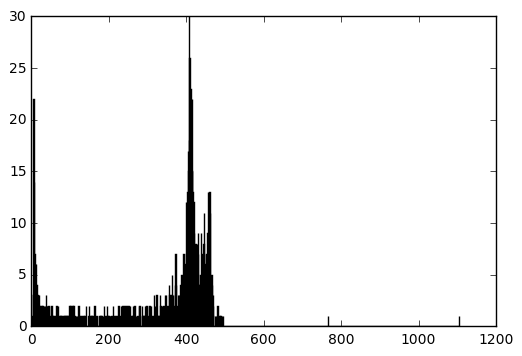

In [20]:
azim_files = []
N = 21

for i in np.arange(-9, 11):
    data_name = root + ('sun' + str(i) + '_0.dat')
    azim_file = np.fromfile(data_name, dtype=float)
    azim_files.append(azim_file)
    
num_files = 20
num_lines = 4
azim_data = []
for i in range(num_files):
    data_name = root + 'sun%d_0.dat' % (i-9)
    with open(data_name) as file:
        line_1 = file.readline().split()
        line_2 = file.readline().split()
        line_3 = file.readline().split()
        data_string = file.readline().split()
        data_float = [float(i) for i in data_string]
        azim_data.append(data_float)
        
azim_avg = []
for i in range(0,20):
    file = azim_data[i]
    temp = []
    for n in range (0,1024):  
        temp.append(0.0)
    for j in np.arange(0, len(file)):
        k = (j % 1024)
        temp[k] = temp[k] + file[j]
    azim_avg.append([(x * (1024/len(file))) for x in temp])
    
flatten = np.hstack(azim_avg[0])
plt.hist(flatten, 1000)

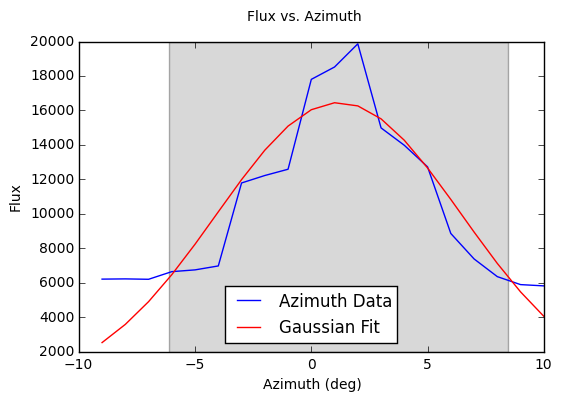

Estimated Telescope Beam Width: -14.5800051929 degrees


In [50]:
#Azimuth Results
x = np.arange(446, 459, 1)
azimuth = np.arange(-9, 11, 1)

azim_data = np.array(azim_data)
flux = []
for a in range(len(azim_data)):
    f = np.sum(azim_data[a][x])
    flux.append(f)

mean = sum(azimuth * flux) / len(azimuth)
c = sum(flux * (azimuth - mean)**2) / len(azimuth)
def g(azimuth, a, b, c):
    return a * np.exp(-(azimuth - b)**2/(2 * c**2))
popt, pcov = curve_fit(g, azimuth, flux)
center = popt[1]
width = 2 * (2 * np.log(2)) * popt[2]
plt.plot(azimuth, flux, label = 'Azimuth Data')
plt.plot(azimuth, g(azimuth, *popt), label = 'Gaussian Fit', color = 'r')
plt.axvspan(center - 0.5 * width, center + 0.5 * width, facecolor = '0.5', alpha = 0.3)
plt.legend(loc = 8)
plt.xlabel('Azimuth (deg)')
plt.ylabel('Flux')
plt.suptitle('Flux vs. Azimuth')
plt.show()
print 'Estimated Telescope Beam Width: ' + np.str(width) + ' degrees'

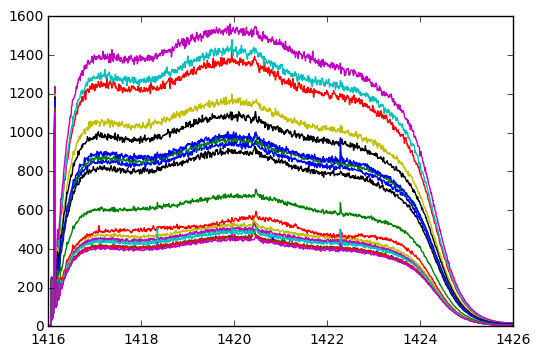

In [5]:
frequency = np.arange(1416, 1426, 0.009766)
for i in range(0,19):    
    plt.plot(frequency,azim_avg[i])
plt.show()

(array([  3.,   1.,   1.,   0.,  10.,  19.,  11.,   7.,   6.,   5.,   4.,
          4.,   4.,   2.,   3.,   3.,   3.,   1.,   3.,   1.,   3.,   1.,
          2.,   2.,   1.,   2.,   0.,   3.,   0.,   3.,   0.,   3.,   2.,
          1.,   2.,   0.,   3.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,
          2.,   1.,   1.,   1.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,
          1.,   1.,   1.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,
          1.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,
          1.,   0.,   0.,   1.,   1.,   0.,   1.,   2.,   1.,   0.,   1.,
          1.,   0.,   0.,   2.,   0.,   1.,   1.,   1.,   0.,   0.,   1.,
          0.,   1.,   0.,   1.,   2.,   0.,   0.,   1.,   0.,   2.,   0.,
          0.,   1.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   2.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   2.,   1., 

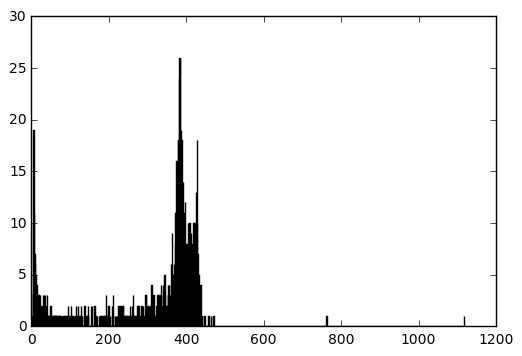

In [60]:
elevation_files = []
for i in np.arange(1,6):
    data_name = root2 + 'sun_el_m' + str(i)
    elev_files = np.fromfile(data_name, dtype=float)
    elevation_files.append(elev_files)

elev_data = []
for i in range(5):
    data_name = root2 + 'sun_el_m%s' % (i+1)
    with open(test2) as file:
        line_1 = file.readline().split()
        line_2 = file.readline().split()
        line_3 = file.readline().split()
        line_4 = file.readline().split()
        data_float = [float(i) for i in line_4]
        elev_data.append(data_float)

for i in range(1,10):
    data_name = root2 + 'sun_el_p' + str(i)
    elev_files = np.fromfile(test2, dtype=float)
    elevation_files.append(elev_files)

for i in range(10):
    data_name = root2 + 'sun_el_p%s' % (i+1)
    with open(data_name) as file:
        line_1 = file.readline().split()
        line_2 = file.readline().split()
        line_3 = file.readline().split()
        line_4 = file.readline().split()
        data_float = [float(i) for i in line_4]
        elev_data.append(data_float)
        
elev_avg = []
for i in range(0,5):
    file = elev_data[i]
    temp = []
    for n in range (0,1024):  
        temp.append(0.0)
    for j in np.arange(0, len(file)):
        k = (j % 1024)
        temp[k] = temp[k] + file[j]
    elev_avg.append([(x * (1024/len(file))) for x in temp])
    
flatten = np.hstack(elev_avg[0])
plt.hist(flatten, 1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


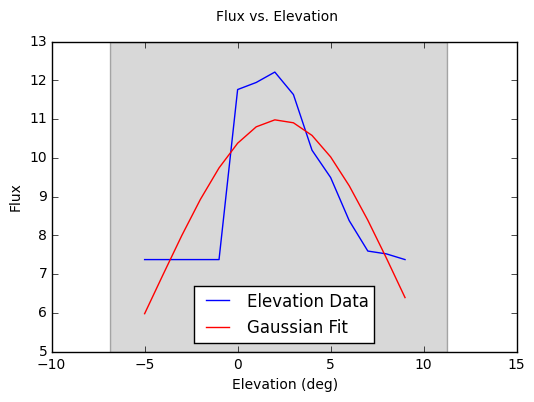

Estimated Telescope Beam Width: -18.1054741247 degrees


In [61]:
#Elevation Results
#x = np.arange(446, 459, 1)
elevation = np.arange(-5, 10, 1)

elev_data = np.array(elev_data)
flux = []
for z in range(len(elev_data)):
    f = np.sum(elev_data[z][x])
    flux.append(f)

mean = sum(elevation * flux) / len(elevation)
c = sum(flux * (elevation - mean)**2) / len(elevation)
def g(elevation, a, b, c):
    return a * np.exp(-(elevation - b)**2/(2 * c**2))
popt, pcov = curve_fit(g, elevation, flux, maxfev = 1000)
center = popt[1]
width = 2 * (2 * np.log(2)) * popt[2]
plt.plot(elevation, flux, label = 'Elevation Data')
plt.plot(elevation, g(elevation, *popt), label = 'Gaussian Fit', color = 'r')
plt.axvspan(center - 0.5 * width, center + 0.5 * width, facecolor = '0.5', alpha = 0.3)
plt.legend(loc = 8)
plt.xlabel('Elevation (deg)')
plt.ylabel('Flux')
plt.suptitle('Flux vs. Elevation')
plt.show()
print 'Estimated Telescope Beam Width: ' + np.str(width) + ' degrees'

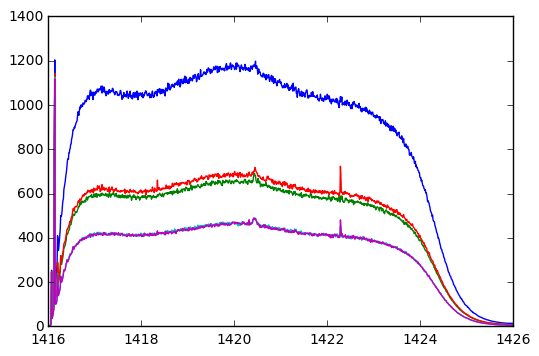

In [9]:
frequency = np.arange(1416, 1426, 0.009766)
for i in range(0,5):    
    plt.plot(frequency,elev_avg[i])
plt.show()

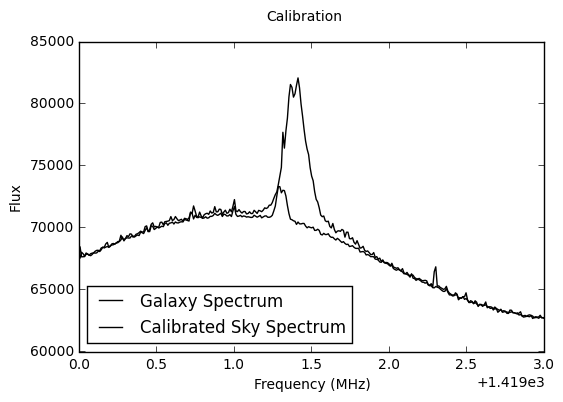

In [10]:
root3 = open('/Users/CatherineClark/Documents/College_Senior/Astro_361/radio/galaxy_data/calib_5m.dat')

root4 = open('/Users/CatherineClark/Documents/College_Senior/Astro_361/radio/galaxy_data/Gal_0_5m.dat')

with root3 as obj:
    root3 = obj.readlines()
    
with root4 as obj:
    root4 = obj.readlines()
    
c = []
for line in range(len(root3)):
    t = line * 4 + 3
    if t > len(root3):
        break
    real = np.float64(root3[t].split())
    c.append(real)
c = np.sum(c, axis = 0)

g = []
for line in range(len(root4)):
    t = line * 4 + 3
    if t > len(root4):
        break
    real = np.float64(root4[t].split())
    g.append(real)

g = np.sum(g, axis = 0)
fx = np.arange(1416, 1426, 0.009766)
plt.plot(fx, g, label = 'Galaxy Spectrum', color = 'k')
plt.plot(fx, c*1.052, label = 'Calibrated Sky Spectrum', color = 'k')
plt.legend(loc = 3)
plt.xlim([1419, 1422])
plt.ylim([60000, 85000])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux')
plt.suptitle('Calibration')
plt.show()

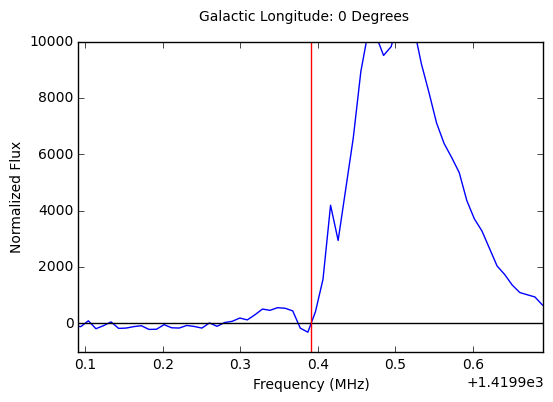

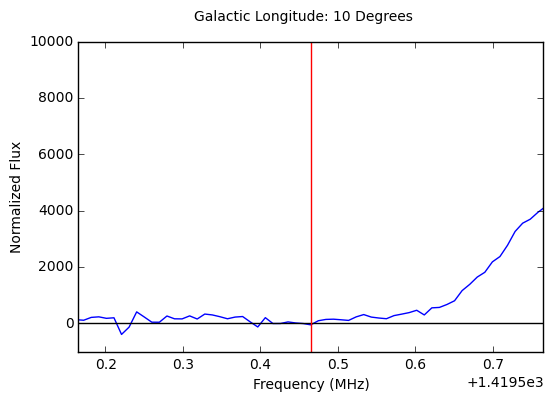

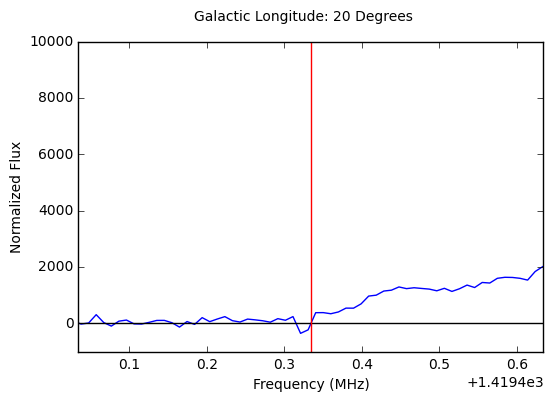

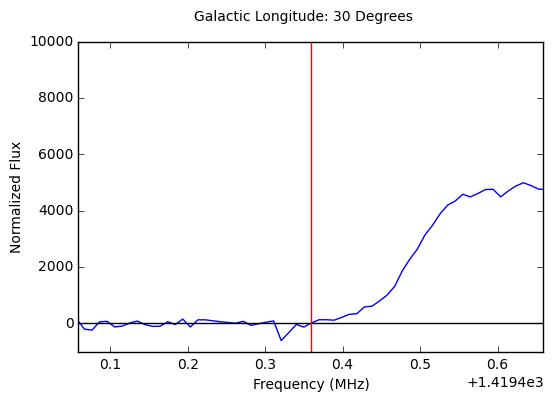

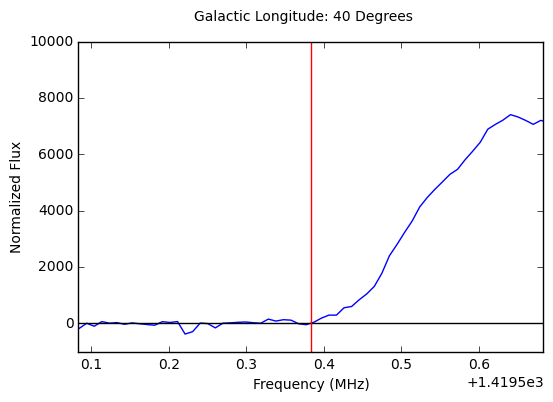

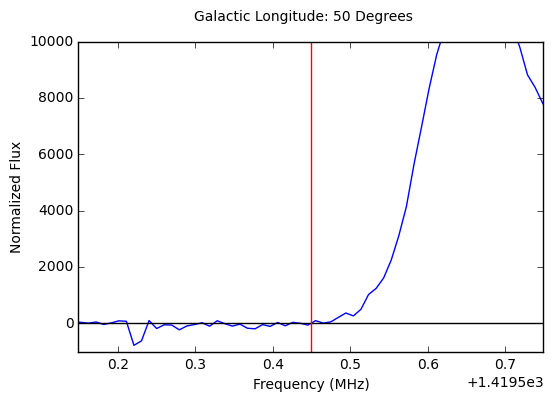

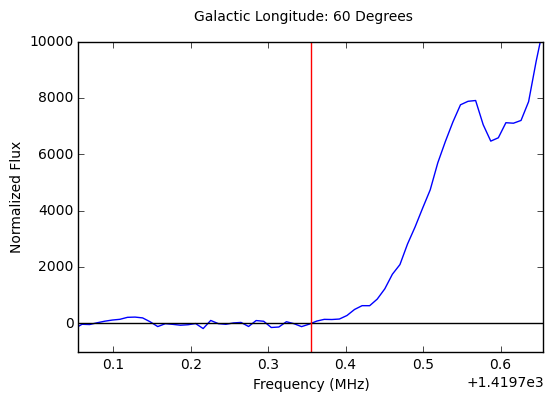

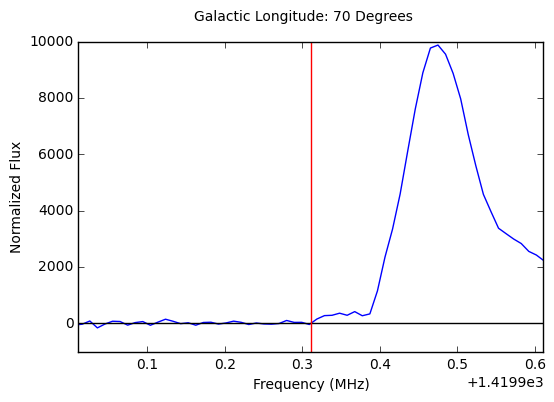

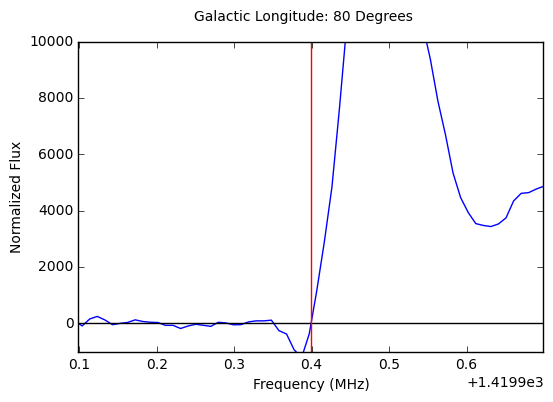

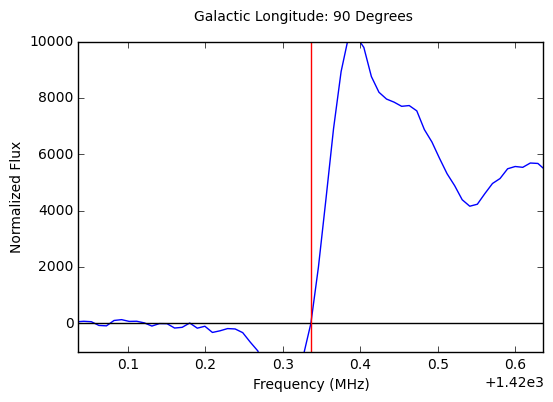

In [13]:
galaxies = ['calib_5m.dat', 'Gal_0_5m.dat', 'Gal10_5m.dat', 'Gal20_5m.dat', 'Gal30_5m.dat', 'Gal40_5m.dat',
            'Gal50_5m.dat', 'Gal60_5m.dat', 'Gal70_5m.dat', 'Gal80_5m.dat', 'Gal90_5m.dat']

factors = (0, 1.059, 1.12, 1.062, 1.115, 1.095, 1.392, 1.093, 0.701, 1.076, 1.063)

data = []
for z in range(len(galaxies)):
    with open('/Users/CatherineClark/Documents/College_Senior/Astro_361/radio/galaxy_data/' + galaxies[z]) as obj:
        read = obj.readlines()
    result = []
    for line in range(len(read)):
        t = line * 4 + 3
        if t > len(read):
            break
        ef = np.float64(read[t].split())
        result.append(ef)
    galaxies[z] = np.sum(result, axis = 0)
    data.append(galaxies[z])
freq = [1420.291, 1419.965, 1419.734, 1419.759, 1419.883, 1419.949, 1420.055, 1420.211, 1420.299, 1420.336]
for z in range(len(data)):
    if z > 0:
        flux = data[z] - data[0] * factors[z]
        plt.plot(fx, flux)
        i = z - 1
        plt.axhline(y = 0, color = 'k', ls = 'solid')
        plt.xlim([freq[i] - 0.3, freq[i] + 0.3])
        plt.axvline(x = freq[i], color = 'r', ls = 'solid')
        plt.ylim([-1000, 10000])
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Normalized Flux')
        plt.suptitle('Galactic Longitude: ' + np.str(z * 10 - 10) + ' Degrees')
        plt.show()

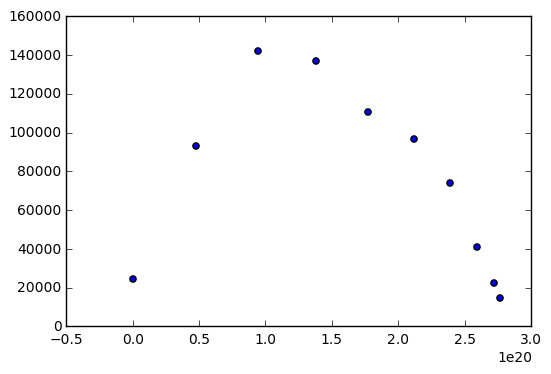

In [18]:
#Rotation Curve Results
hydrogen_line = 1420.4057517700055
receiver_velocity = 220000

test = []
for i in freq:
    source_velocity = (1420.4057517700055 / i) * (3e8) - 3e8
    test.append(source_velocity)
    
R_nought = 2.469e20
g = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
g = np.deg2rad(g)

for i in g:
    R = np.array((2.469e20 * np.sin(g)) / np.sin(90))
    
plt.scatter(R, test)
plt.show()

Conclusion: In this lab we learned how to calibrate radio data.  We also investigated the beam width for the azimuth and elevation data.  We then were able to plot the rotation curve of the Milky Way Galaxy.